In [1]:
import cv2 as cv

# Reading The Image

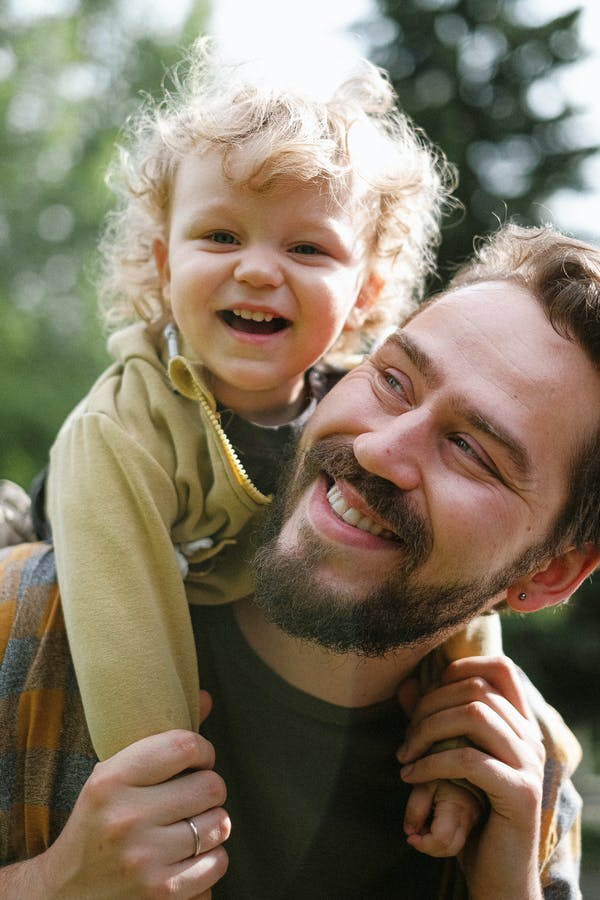

In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow

# Load image
img = cv.imread('/content/baby.jpeg')

# Display image in Colab notebook
cv2_imshow(img)


# Different functions in opencv

* grayscaling an Image
* Blurring an image
* edge cascade
* Dilating the image
* eroding the image
* resizing 
* Cropping
* Image Transformation
* Counter Detection

# grayscaling an Image

* Grayscale images have only one color channel, which makes them easier to process and analyze. They also require less storage space than color images, which is important when dealing with large datasets.

* In addition, many image processing techniques and algorithms work better on grayscale images than on color images. For example, edge detection algorithms can be more accurate on grayscale images because they only have to analyze one color channel, rather than three in the case of color images.

* Grayscale images are also commonly used in computer vision applications such as facial recognition, object detection, and optical character recognition (OCR). In these applications, grayscale images can help reduce the impact of variations in lighting and color that might otherwise affect the performance of the algorithms.

* Overall, converting images to grayscale is an important technique in computer vision and image processing that can help improve the accuracy and efficiency of many applications.

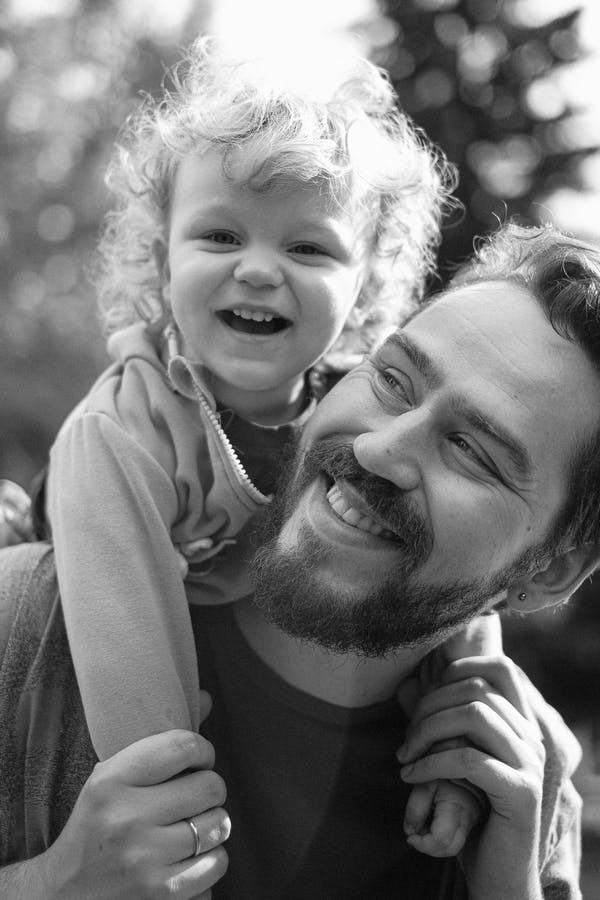

In [4]:
# converting to greyscale

greyimage=cv.cvtColor(img,cv.COLOR_BGR2GRAY)

#Display the grayscaled image
cv2_imshow(greyimage)
cv.waitKey(0)
cv.destroyAllWindows()

# Blurring an image
* One common use of blurring is to reduce noise in an image. Noise can be caused by various factors such as sensor limitations, compression, and transmission errors.
* Applying a blur filter can help smooth out these variations and reduce the amount of noise in the image

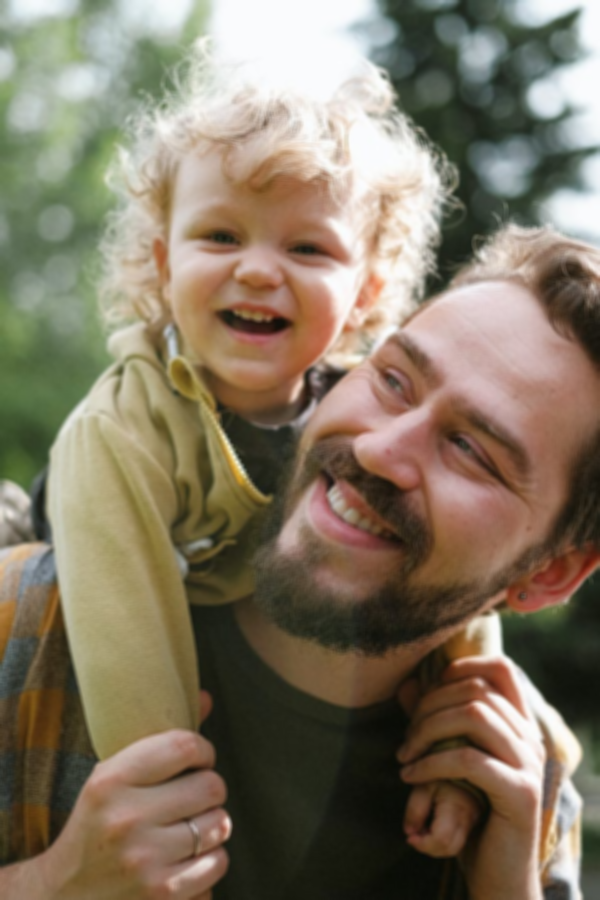

In [5]:
# Loadimghe image
bimg = cv.imread('/content/baby.jpeg')

# converting to blur image
blurimage=cv.GaussianBlur(bimg, (5, 5), cv.BORDER_DEFAULT)

#Display the Blurred image
cv2_imshow(blurimage)
cv.waitKey(0)
cv.destroyAllWindows()

# Edge cascade
* An edge cascade is a series of edge detection filters applied to an image in sequence to extract edges at different scales and orientations.
* The idea behind an edge cascade is that edges in an image can have different characteristics, such as sharpness, thickness, and orientation, depending on the scale and direction of the image features

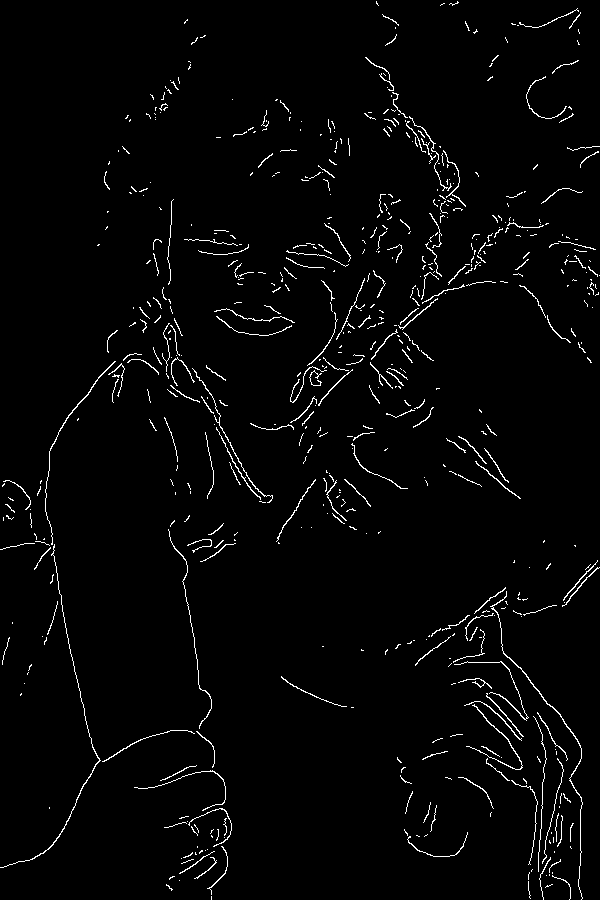

In [6]:
canny = cv.Canny(blurimage,125, 127)

cv2_imshow(canny) 

# Dilation
Dilation is a morphological operation in image processing that can be used to enhance or emphasize features in an image. The operation involves moving a structuring element (a small matrix of pixels) over the image and replacing each pixel with the maximum value of the pixels within the structuring element

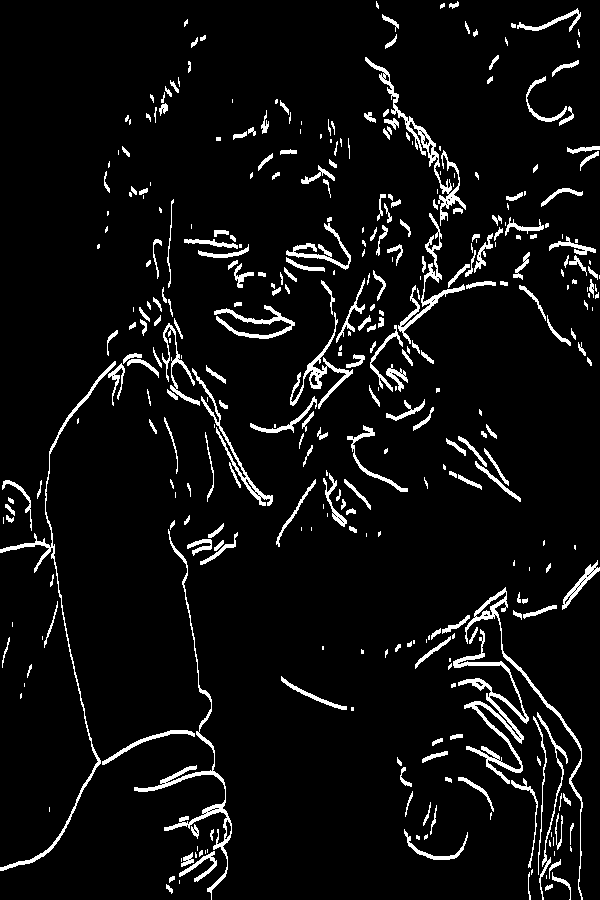

In [7]:
dilated_img = cv.dilate(canny, (7,7), iterations=3)
cv2_imshow(dilated_img) 

# Eroding the image
* Erosion is a morphological operation in image processing that can be used to remove small details, such as noise or thin lines, from an image.
* The operation involves moving a structuring element (a small matrix of pixels) over the image and replacing each pixel with the minimum value of the pixels within the structuring element

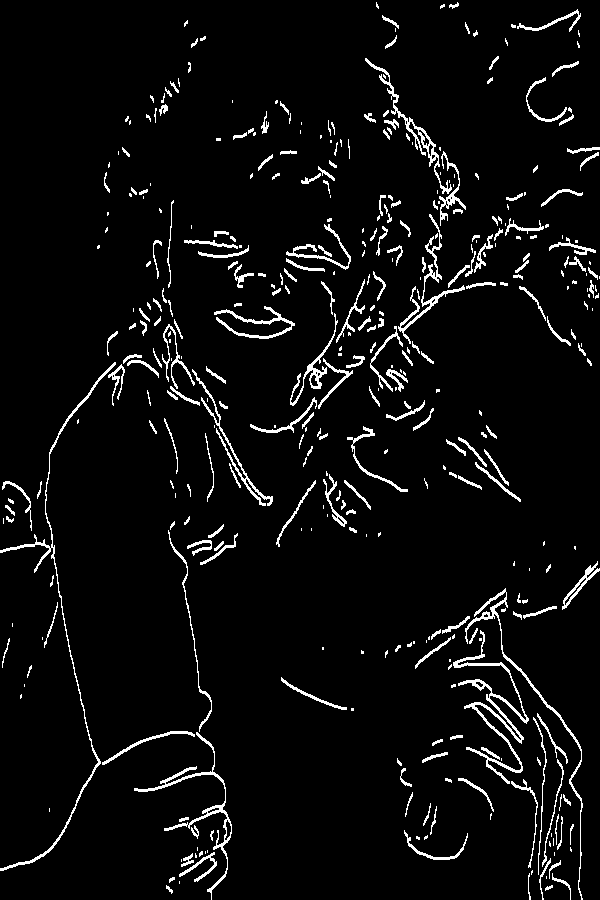

In [8]:
eroded = cv.erode(dilated_img, (3,3), iterations=1)
cv2_imshow(eroded)

# Resize an Images

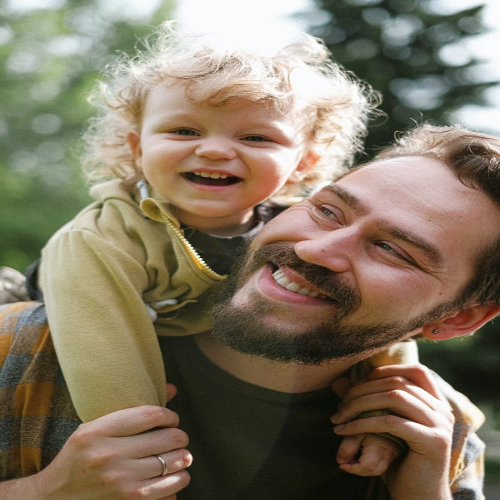

In [9]:
resized = cv.resize(img, (500,500),)
cv2_imshow(resized)

# Cropping an image

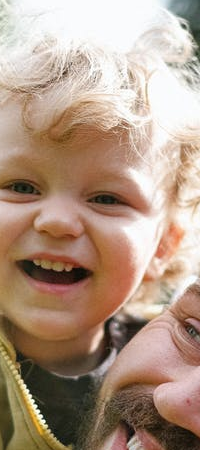

In [10]:
cropped = img[50:500, 200:400]
cv2_imshow(cropped)

# Image Transformations
# Translation
* The translation function in OpenCV is used to shift an image by a specified amount in the x and y directions.
* The function takes the input image and the x and y offsets as input parameters. The x and y offsets are specified in pixels.
The function returns the translated image

# -x ---> left
# -y ---> up
# x ---> Right
# y ---> Down

In [11]:
import numpy as np

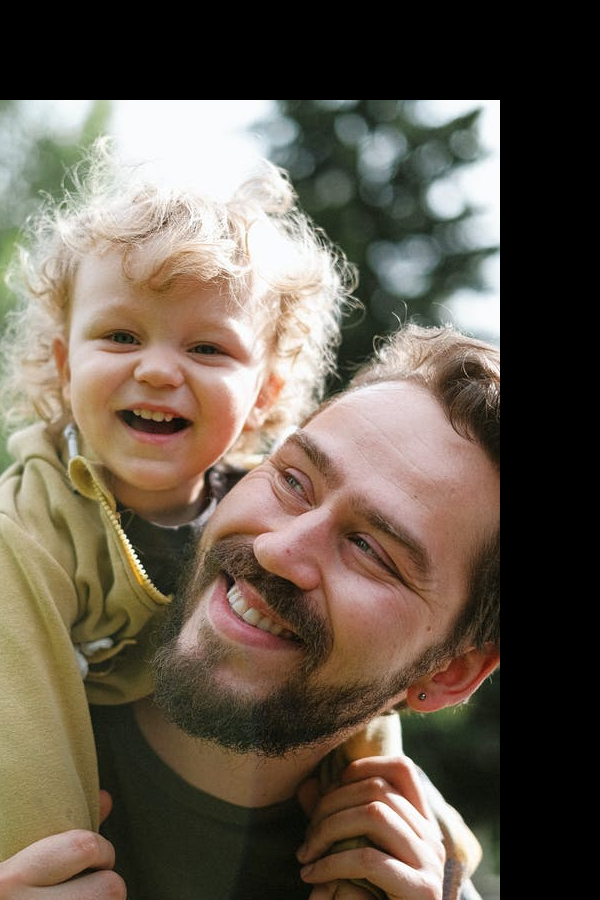

In [12]:
def translate(img, x, y):
  transmat = np.float32([[1,0,x],[0,1,y]])
  dimensions =(img.shape[1], img.shape[0])
  return cv.warpAffine(img, transmat, dimensions)

translated = translate(img, -100, 100)
cv2_imshow(translated)


# Rotation
* The rotation function in OpenCV is used to rotate an image by a specified angle.
 * The function takes the input image, the rotation angle, and the rotation point as input parameters.
 * The rotation point is the center of rotation, and the angle is specified in degrees.
 * The function returns the rotated image

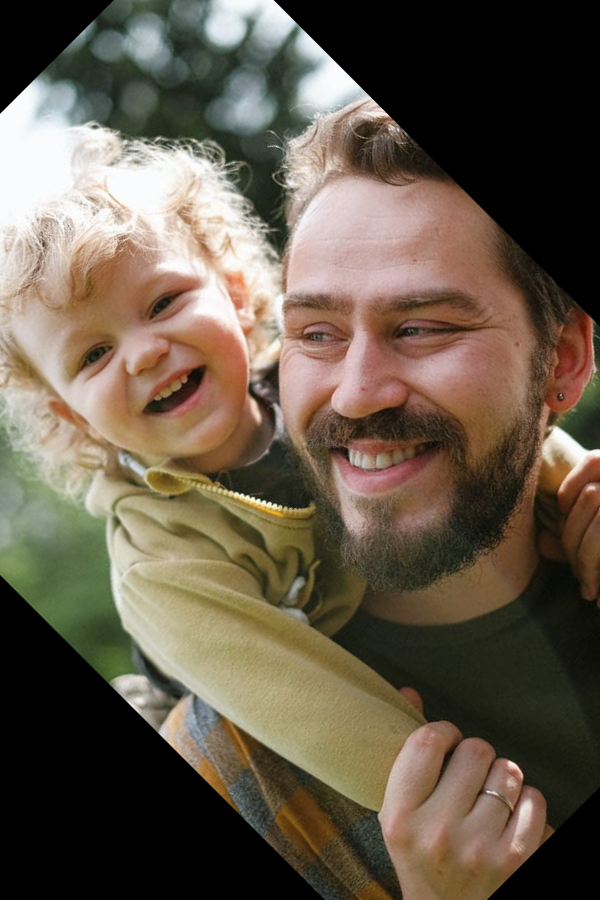

In [13]:
def rotate(img, angle,rotPoint=None):
  (height,width) = img.shape[:2]

  if rotPoint is None:
    rotPoint = (width//2,height//2)

  rotmat = cv.getRotationMatrix2D(rotPoint, angle, 1.0)
  dimensions = (width,height)

  return cv.warpAffine(img, rotmat, dimensions)

rotated = rotate(img, 45)
cv2_imshow(rotated)

# Flipping an Image
* 0: Flip the image vertically (i.e., around the x-axis)
* 1: Flip the image horizontally (i.e., around the y-axis)
* -1: Flip the image both vertically and horizontally (i.e., around both x-axis and y-axis)

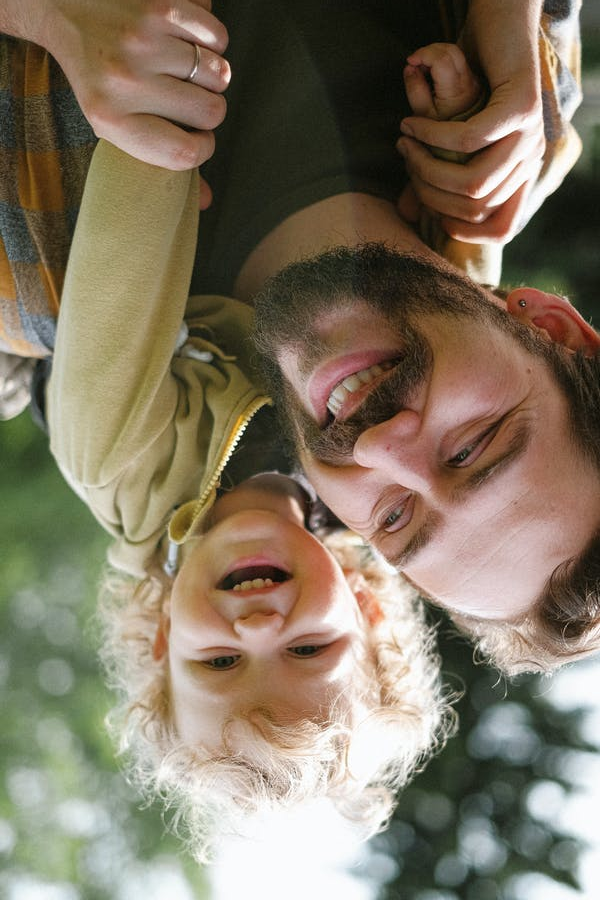

In [14]:
flip = cv.flip(img, 0)
cv2_imshow(flip)

# Counter Detection by using canny
* contour detection which is the process of finding the boundaries of objects in an image.
* Contour detection can be used to detect and count objects in an image by finding the contours of the objects and then counting the number of contours detected

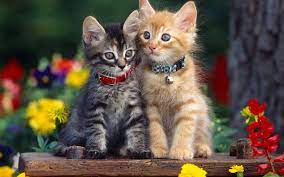

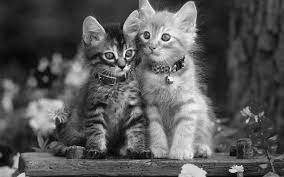

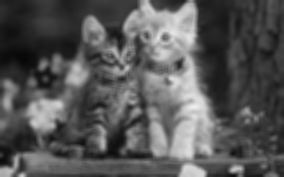

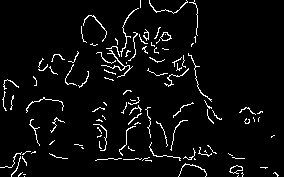

111 contour(s) found!


In [16]:
# Load image
cimg = cv.imread('/content/cats.jpeg')

# Display image in Colab notebook
cv2_imshow(cimg)

# converting to greyscale

greyimage=cv.cvtColor(cimg,cv.COLOR_BGR2GRAY)

#Display the grayscaled image
cv2_imshow(greyimage)

blurimage=cv.GaussianBlur(greyimage, (5, 5), cv.BORDER_DEFAULT)
cv2_imshow(blurimage)


canny = cv.Canny(blurimage, 125, 175)
cv2_imshow(canny)

# Find contours
contours, hierarchy = cv.findContours(canny, cv.RETR_LIST, cv.CHAIN_APPROX_NONE)
print(f'{len(contours)} contour(s) found!')


# Draw the contours on the original image canny

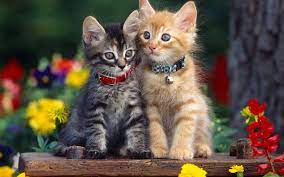

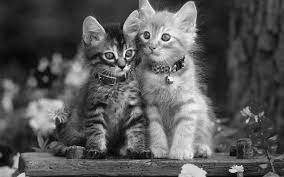

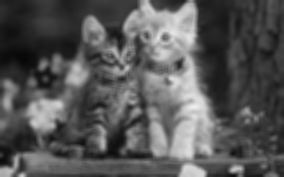

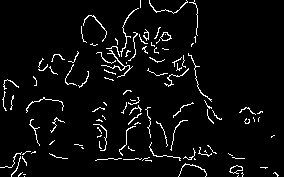

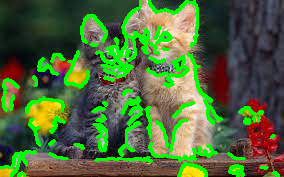

Number of objects: 111


In [21]:
# Load the image
img = cv.imread('/content/cats.jpeg')
cv2_imshow(img)

# Convert the image to grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv2_imshow(gray)

blurimage=cv.GaussianBlur(greyimage, (5, 5), cv.BORDER_DEFAULT)
cv2_imshow(blurimage)


canny = cv.Canny(blurimage, 125, 175)
cv2_imshow(canny)

# Find contours in the binary image
contours, hierarchy = cv.findContours(canny, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

# Draw the contours on the original image
cv.drawContours(img, contours, -1, (0, 255, 0), 2)

# Count the number of contours
num_contours = len(contours)

# Display the image and number of contours
cv2_imshow(img)
print('Number of objects:', num_contours)

# Draw the contours on the Blank image using canny

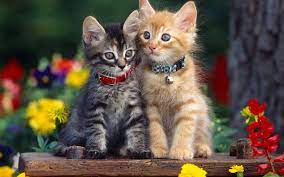

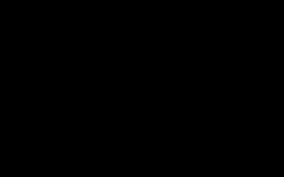

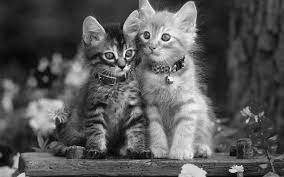

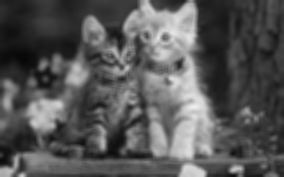

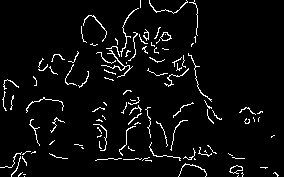

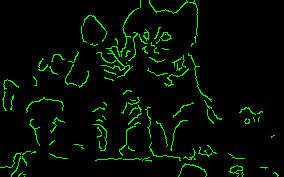

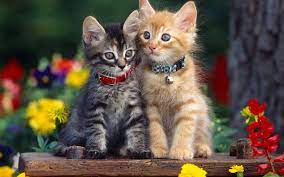

Number of objects: 111


In [23]:
# Load the image
img = cv.imread('/content/cats.jpeg')
cv2_imshow(img)

blank = np.zeros(img.shape, dtype='uint8')
cv2_imshow(blank)

# Convert the image to grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv2_imshow(gray)

blurimage=cv.GaussianBlur(greyimage, (5, 5), cv.BORDER_DEFAULT)
cv2_imshow(blurimage)


canny = cv.Canny(blurimage, 125, 175)
cv2_imshow(canny)

# Find contours in the binary image
contours, hierarchy = cv.findContours(canny, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

# Draw the contours on the original image
cv.drawContours(blank, contours, -1, (0, 255, 0), 1)
cv2_imshow(blank)

# Count the number of contours
num_contours = len(contours)

# Display the image and number of contours
cv2_imshow(img)
print('Number of objects:', num_contours)

# Counter Detection by using Thresholding

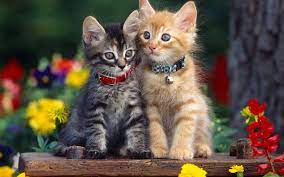

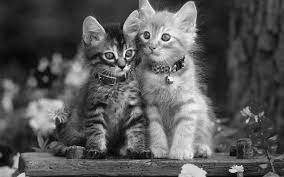

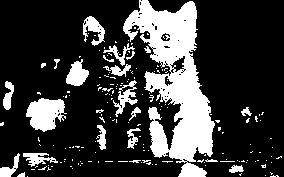

253 contour(s) found!


In [24]:
# Load image
cimg = cv.imread('/content/cats.jpeg')

# Display image in Colab notebook
cv2_imshow(cimg)

# converting to greyscale

greyimage=cv.cvtColor(cimg,cv.COLOR_BGR2GRAY)

#Display the grayscaled image
cv2_imshow(greyimage)

ret, thresh = cv.threshold(greyimage, 125, 255, cv.THRESH_BINARY)
cv2_imshow(thresh)

# Find contours
contours, hierarchy = cv.findContours(thresh, cv.RETR_LIST, cv.CHAIN_APPROX_NONE)
print(f'{len(contours)} contour(s) found!')


# Draw the contours on the original image by using Thresholding

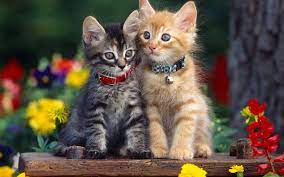

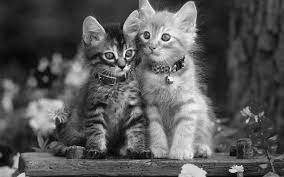

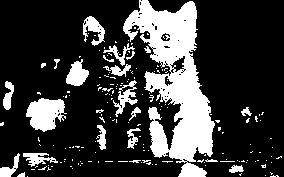

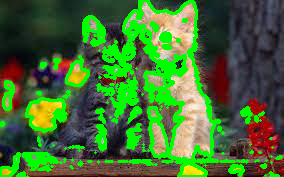

Number of objects: 253


In [25]:
import cv2

# Load the image
img = cv2.imread('/content/cats.jpeg')
cv2_imshow(img)

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

# Apply thresholding to binarize the image
ret, thresh = cv2.threshold(gray, 125, 255, cv2.THRESH_BINARY)

cv2_imshow(thresh)

# Find contours in the binary image
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on the original image
cv2.drawContours(img, contours, -1, (0, 255, 0), 2)

# Count the number of contours
num_contours = len(contours)

# Display the image and number of contours
cv2_imshow(img)
print('Number of objects:', num_contours)

# Wait for key press and then close the window
cv2.waitKey(0)
cv2.destroyAllWindows()


# Draw the contours on the Blank Image by using Thresholdinh

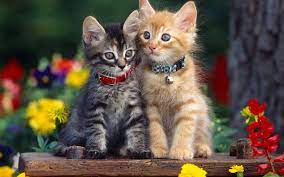

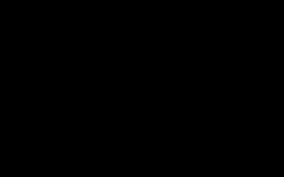

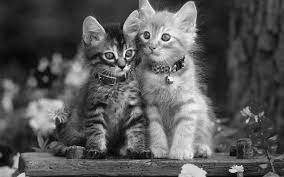

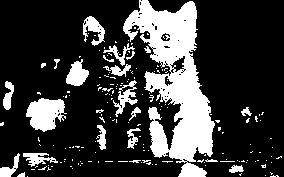

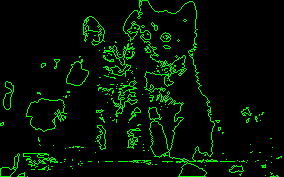

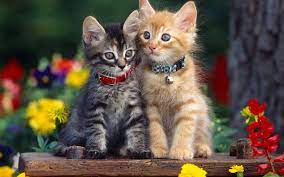

Number of objects: 253


In [26]:
import cv2

# Load the image
img = cv2.imread('/content/cats.jpeg')
cv2_imshow(img)

blank = np.zeros(img.shape, dtype='uint8')
cv2_imshow(blank)

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

# Apply thresholding to binarize the image
ret, thresh = cv2.threshold(gray, 125, 255, cv2.THRESH_BINARY)

cv2_imshow(thresh)

# Find contours in the binary image
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on the original image
cv2.drawContours(blank, contours, -1, (0, 255, 0), 1)
cv2_imshow(blank)
# Count the number of contours
num_contours = len(contours)

# Display the image and number of contours
cv2_imshow(img)
print('Number of objects:', num_contours)
